In [377]:
import pandas as pd
import numpy as np

import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='iremoze', api_key='pRAt4yKgtusULCVgagiv')

from sklearn.cluster import DBSCAN
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


In [378]:
df = pd.read_excel('Comapany1(DF).xlsx')

In [379]:
df['new_time'] = [d.time() for d in df['Date/time occurrence']]
df['new_date'] = [d.date() for d in df['Date/time occurrence']]

df.sort_values(by = 'Date/time occurrence')

,Date/time occurrence,End devices,Malicious code,Respnse,Type of malware,Details,new_time,new_date
0,2017-01-02 07:58:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:58:00,2017-01-02
1,2017-01-03 07:57:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:57:00,2017-01-03
2,2017-01-03 08:02:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),08:02:00,2017-01-03
3,2017-01-03 10:16:00,2f,Defo.A,none,virus,MBR (0x80),10:16:00,2017-01-03
4,2017-01-03 16:30:00,2f,Defo.A,none,virus,MBR (0x80),16:30:00,2017-01-03
5,2017-01-04 08:29:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),08:29:00,2017-01-04
6,2017-01-05 07:58:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:58:00,2017-01-05
7,2017-01-06 07:56:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:56:00,2017-01-06
8,2017-01-07 08:03:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),08:03:00,2017-01-07
9,2017-01-09 08:06:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),08:06:00,2017-01-09


In [380]:
df["new_date"] = df["new_date"].map(lambda x: x.strftime("%Y%m%d"))
#%Y%m%d

In [381]:
df.sort_values(by = 'Date/time occurrence')

,Date/time occurrence,End devices,Malicious code,Respnse,Type of malware,Details,new_time,new_date
0,2017-01-02 07:58:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:58:00,20170102
1,2017-01-03 07:57:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:57:00,20170103
2,2017-01-03 08:02:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),08:02:00,20170103
3,2017-01-03 10:16:00,2f,Defo.A,none,virus,MBR (0x80),10:16:00,20170103
4,2017-01-03 16:30:00,2f,Defo.A,none,virus,MBR (0x80),16:30:00,20170103
5,2017-01-04 08:29:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),08:29:00,20170104
6,2017-01-05 07:58:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:58:00,20170105
7,2017-01-06 07:56:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:56:00,20170106
8,2017-01-07 08:03:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),08:03:00,20170107
9,2017-01-09 08:06:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),08:06:00,20170109


In [382]:
df['freq'] = df.groupby('new_date')['new_date'].transform('count')


In [383]:
#df.freq = pd.to_numeric(df.freq, errors='coerce')
#df.new_date = pd.to_numeric(df.new_date, errors='coerce')


In [384]:
"""
trace = go.Scatter(
    x = df['new_date'],
    y = df['freq']
)

data = [trace]

py.iplot(data, filename='basic-line')
"""

"\ntrace = go.Scatter(\n    x = df['new_date'],\n    y = df['freq']\n)\n\ndata = [trace]\n\npy.iplot(data, filename='basic-line')\n"

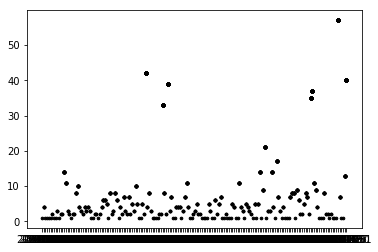

In [385]:
f2 = df['freq'].values
f1 = df['new_date'].values
X = np.array(list(zip(f1,f2)))
plt.scatter(f1,f2, c='black', s=7)

In [462]:
model = DBSCAN(eps= 100, min_samples= 90).fit(X)
model


DBSCAN(algorithm='auto', eps=100, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=90, n_jobs=1, p=None)

In [463]:
df['model'] = model.labels_
print(Counter(model.labels_))
df.head(4)

Counter({0: 924, -1: 8})


,Date/time occurrence,End devices,Malicious code,Respnse,Type of malware,Details,new_time,new_date,freq,model
0,2017-01-02 07:58:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:58:00,20170102,1,-1
1,2017-01-03 07:57:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),07:57:00,20170103,4,-1
2,2017-01-03 08:02:00,과장님컴퓨터,Defo.A,none,virus,MBR (0x80),08:02:00,20170103,4,-1
3,2017-01-03 10:16:00,2f,Defo.A,none,virus,MBR (0x80),10:16:00,20170103,4,-1


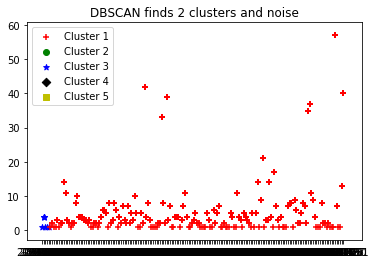

In [464]:
for i in range(0, len(df)):
    if df['model'][i] == 0:
         c1 = plt.scatter(df['new_date'][i],df['freq'][i],c='r',marker='+')
    elif df['model'][i] == 1:
         c2 = plt.scatter(df['new_date'][i],df['freq'][i],c='g',marker='o')
    elif df['model'][i] == -1:
         c3 = plt.scatter(df['new_date'][i],df['freq'][i],c='b',marker='*')
    elif df['model'][i] == 2:
         c4 = plt.scatter(df['new_date'][i],df['freq'][i],c='k',marker='D')
    elif df['model'][i] == 3:
         c5 = plt.scatter(df['new_date'][i],df['freq'][i],c='y',marker='s')
            
            
plt.legend([c1, c2, c3,c4,c5], ['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4','Cluster 5'])
plt.title('DBSCAN finds 2 clusters and noise')
plt.show()